<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

Source: https://github.com/hhsu15/stockPrediction/tree/b4169f384f7b84e3723c8e4c5fb712d86156752a/GA_DS_materials/linear-regression-master/practice

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

% matplotlib inline

In [3]:
sac = pd.read_csv('./data/sacramento_real_estate_transactions.csv')
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [4]:
sac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


we have 985 entreis and 12 available featuers each

In [5]:
print("dimension of sacramento data: {}".format(sac.shape))

dimension of sacramento data: (985, 12)


In [6]:
sac.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


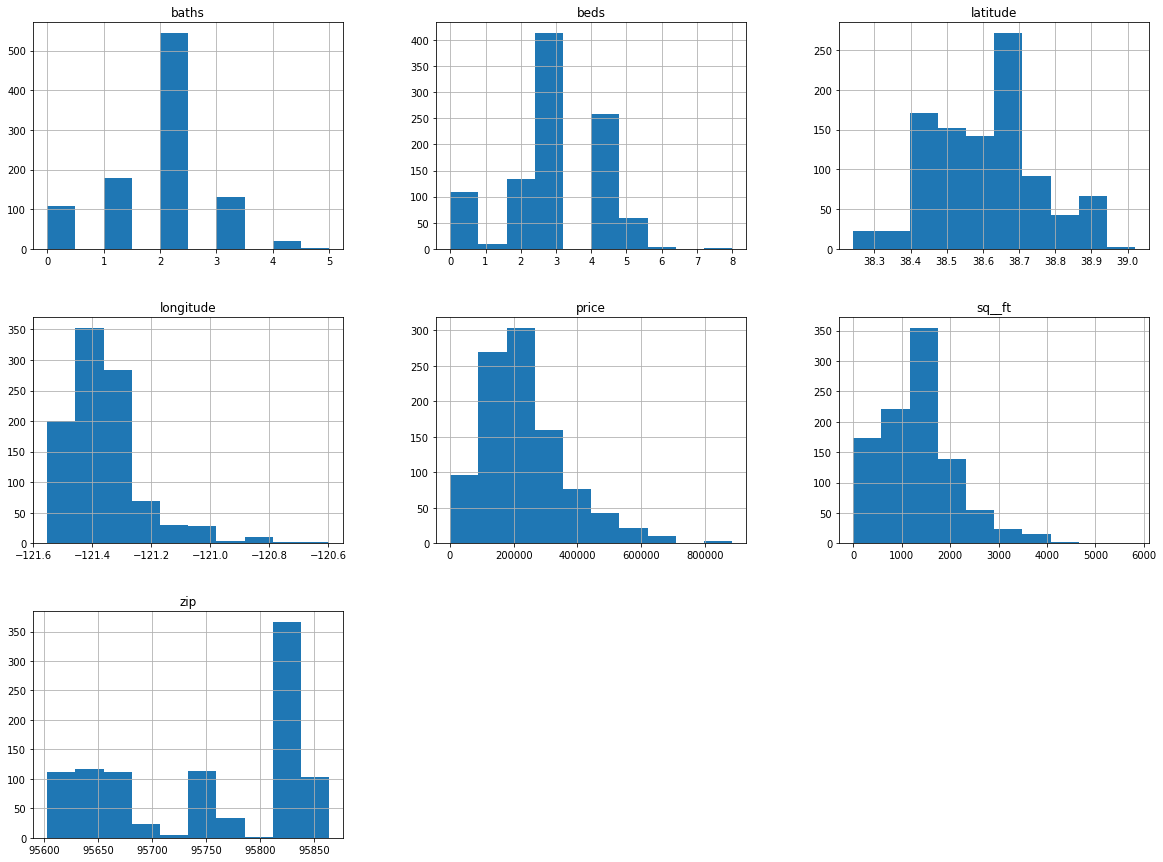

In [12]:
sac.hist(bins = 10, figsize=(20, 15))
plt.show()

__Search dataset to identify any NAs in the set__

In [7]:
sac.isnull().any()

street       False
city         False
zip          False
state        False
beds         False
baths        False
sq__ft       False
type         False
sale_date    False
price        False
latitude     False
longitude    False
dtype: bool

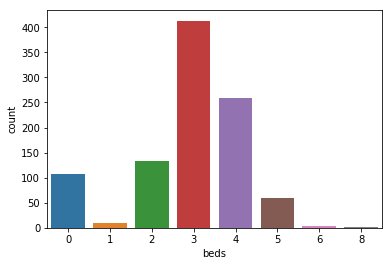

In [8]:
sns.countplot(x = 'beds', data = sac);

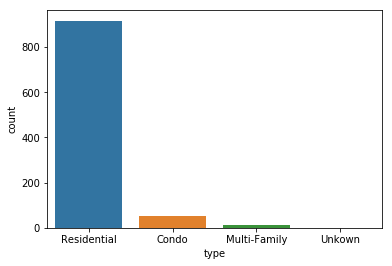

In [9]:
sns.countplot(x = 'type', data = sac);

We may need to make `type` a dummy variable.

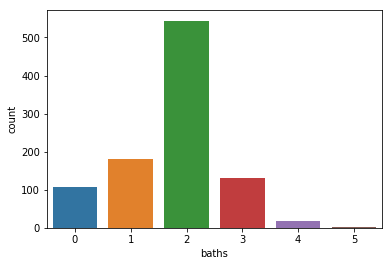

In [10]:
sns.countplot(x = 'baths', data = sac);

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

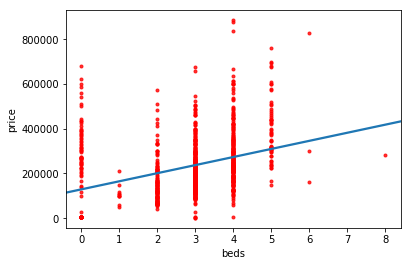

In [11]:
# price ~ beds
sns.regplot(sac.beds, sac.price, order = 1, ci = None, 
           scatter_kws={'color':'r', 's':9})

In [ ]:
# r squared for price ~ beds
lm = smf.o

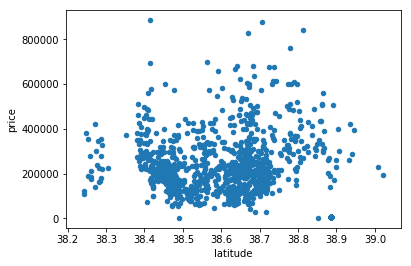

In [17]:
sac.plot(kind='scatter', x="latitude", y='price')

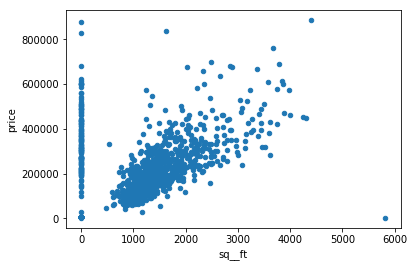

In [18]:
sac.plot(kind='scatter', x="sq__ft", y='price')

In [19]:
corr_matrix = sac.corr()
corr_matrix['price'].sort_values(ascending=False)

price        1.000000
baths        0.416208
beds         0.342024
sq__ft       0.333897
longitude    0.284485
latitude    -0.039573
zip         -0.093353
Name: price, dtype: float64

plot the correlation matrix using a heatmap to explore the correlation between features

Text(0.5,1,'Correlation between different features')

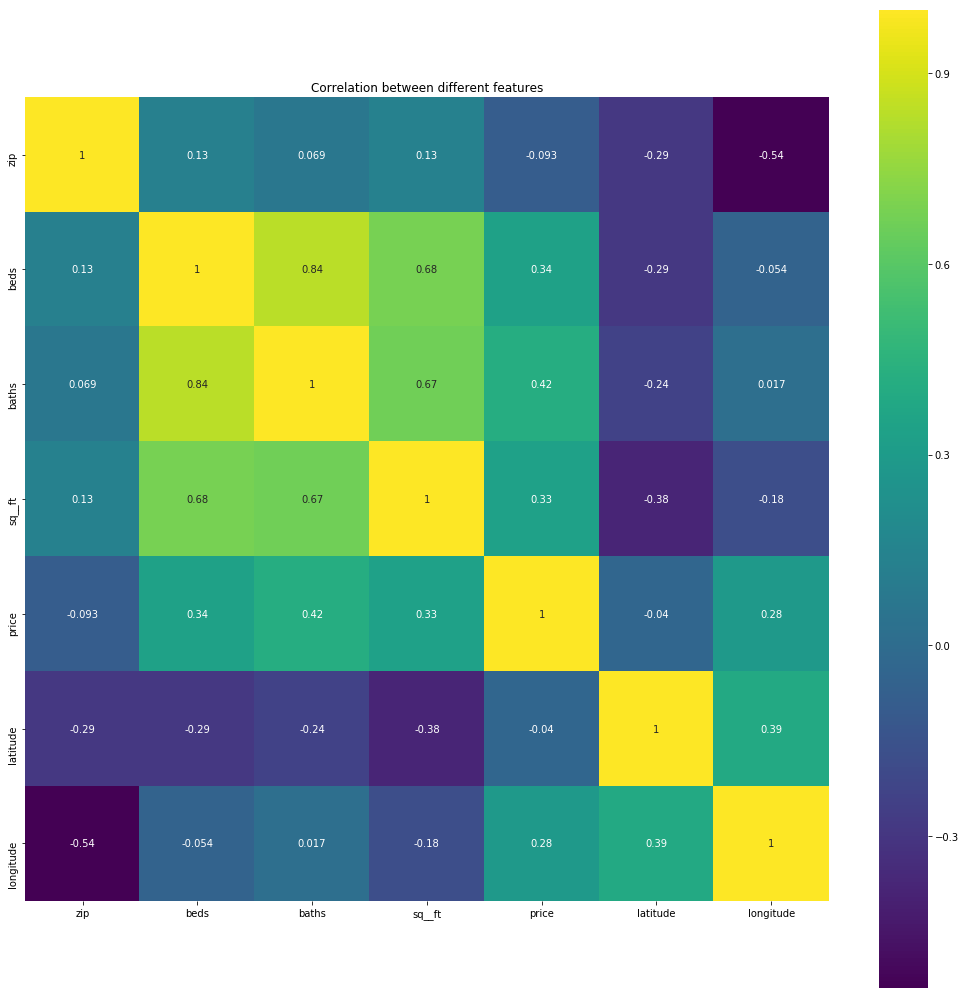

In [20]:
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different features')

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [6]:
# A:

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: